In [11]:
import matplotlib.pyplot as plt
from merlion.evaluate.forecast import ForecastMetric
from merlion.models.defaults import (
    DefaultForecasterConfig, DefaultForecaster)
from merlion.utils import TimeSeries as TS
from scipy.stats import norm
from ts_datasets.forecast import M4

In [3]:
time_series, metadata = M4(subset='Hourly')[0]
train = TS.from_pd(time_series[metadata.trainval])
test = TS.from_pd(time_series[-metadata.trainval])

100%|██████████| 414/414 [00:00<00:00, 816.05it/s]


In [6]:
mod = DefaultForecaster(DefaultForecasterConfig())
mod.train(train_data=train)
pred, err = mod.forecast(time_stamps=test.time_stamps)

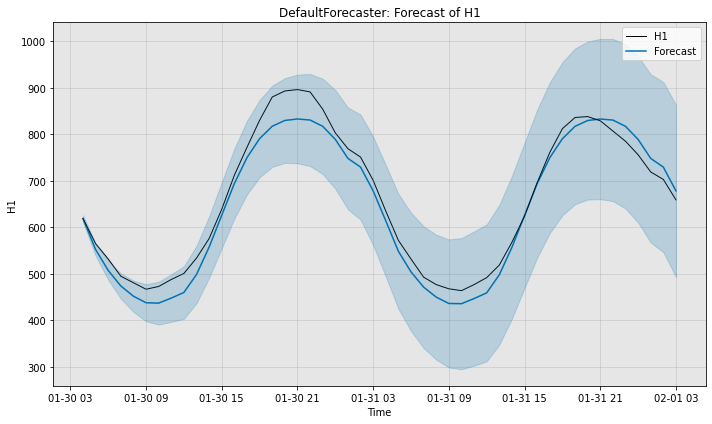

In [9]:
fig, ax = mod.plot_forecast(time_series=test, 
                            plot_forecast_uncertainty=True)

In [14]:
# vals on [0, 100]; smaller is better
smape = ForecastMetric.sMAPE.value(ground_truth=test, predict=pred)

# MSIS of the mod's 95%CI (on [0, 100]; smaller is better)
lb = TS.from_pd(pred.to_pd() + norm.ppf(0.025) * err.to_pd().values)
ub  = TS.from_pd(pred.to_pd() + norm.ppf(0.975) * err.to_pd().values)
msis = ForecastMetric.MSIS.value(
    ground_truth=test, predict=pred, insample=train, lb=lb, ub=ub)

In [18]:
print(f'sMAPE: {smape:.4f}\tMSIS: {msis:.4f}')

sMAPE: 4.1944	MSIS: 19.3027
